#### Student Name: Zheng Hanming
#### Student ID: 21225621

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# importing data
df = pd.read_csv('./bank.csv')
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'subscribed']
categorical_cols_wo_subscribed = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']

✔️ Task 1 - Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).<br/>
- From the dataset columns, we have some basic information about the client and clients' various loan statuses. Additional information about campaigns are available too. The last column indicates if client has subscribed for term deposit that is offered by the bank. Without looking at the actual data, someting that might be interesting to find out might be "Who are the target customers for our term deposit?". We can answer this question by training the model and predict the subscription outcome for each customer. 

Understanding the dataset
- age(numerical): age
- job(categorical): job type
- marital(categorical): marital status
- default(categorical): has credit in default
- balance(numerical): bank account balance(assumption)
- housing(categorical): has housing loan
- loan(categorical): has personal loan
- contact(categorical): communication type
- day: day of month of previous contact
- month: month of previous contact
- duration(numerical): the duration of the call promoting the term deposit. This is known at the same time as the final subscription is known. And this shouldn't be used to predict the outcome
- campaign(numerical): number of contacts performed during this campaign
- pdays(numerical): number of days passed after last contact
- previous(numerical): number of contacts performed before this campaign
- poutome(categorical): outcome of previous campaign
- subscribed(categorical): if client has subscribed a term deposit

In [15]:
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

✔️ Task 2 - Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
- In general, the dataset is pretty well populated, most of the columns are populated with values, close to 2000. With the exception of a few columns like contact type and previous campaign outcome. 
- The mean balance is more than doubled of median income. 
- More than half of the customers are married and more than half of the customers have housing loan.
- Very few of of the customers have default loans with them.
- There are a lot of customers with personal loans.
- The subscription status of term deposit is exactly 50% which is very high.
- Contact type might not be a useful feature of this model but we have significantly higher mobile contacts than fixed lines.
- From the heatmap & pairplot below, we can observe that there is no clear relationship between the features.

Brief examination of numerical statistics
- missing value: age(2)
- skewed:
  - balance: mean(1413) | median(551)
  - duration: mean(292) | median(236)
  - campaign: mean(1.9) | median(1)

Brief examination of categorical statistics
- most of the customers are of middle to higher income: management, technician, blue-collar.(1107)
- more than half of the customers are married(1111).
- very small number of customer have defaulted loans(15).
- number of customers with housing loan(1037) is close to number of married customers(1111).
- significant number of customers with personal loan(1750).
- number of customers with mobile contact(1663) is significantly higher than fixed lines(146). This is aligning with general population lifestyle.
- the success failure ratio of previous campaign outcome is about 50% which is very high.

In [16]:
# count the number available data points for each column
df.count()


age           1988
job           1990
marital       2000
education     1896
default       2000
balance       2000
housing       2000
loan          2000
contact       1809
day           2000
month         2000
duration      2000
campaign      2000
pdays         2000
previous      2000
poutcome      1546
subscribed    2000
dtype: int64

In [17]:
# statistics for numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [18]:
for attr in categorical_cols:
    print(f'-------------- {attr} --------------')
    print(df[attr].value_counts())


-------------- job --------------
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64
-------------- marital --------------
married     1111
single       674
divorced     215
Name: marital, dtype: int64
-------------- default --------------
no     1985
yes      15
Name: default, dtype: int64
-------------- housing --------------
no     1037
yes     963
Name: housing, dtype: int64
-------------- loan --------------
no     1750
yes     250
Name: loan, dtype: int64
-------------- contact --------------
cellular     1663
telephone     146
Name: contact, dtype: int64
-------------- poutcome --------------
failure    955
success    444
other      147
Name: poutcome, dtype: int64
-------------- subscribed --------------
no     1000
yes    1000
Name: subscribed, dtype: int64


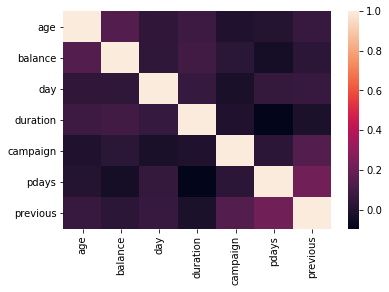

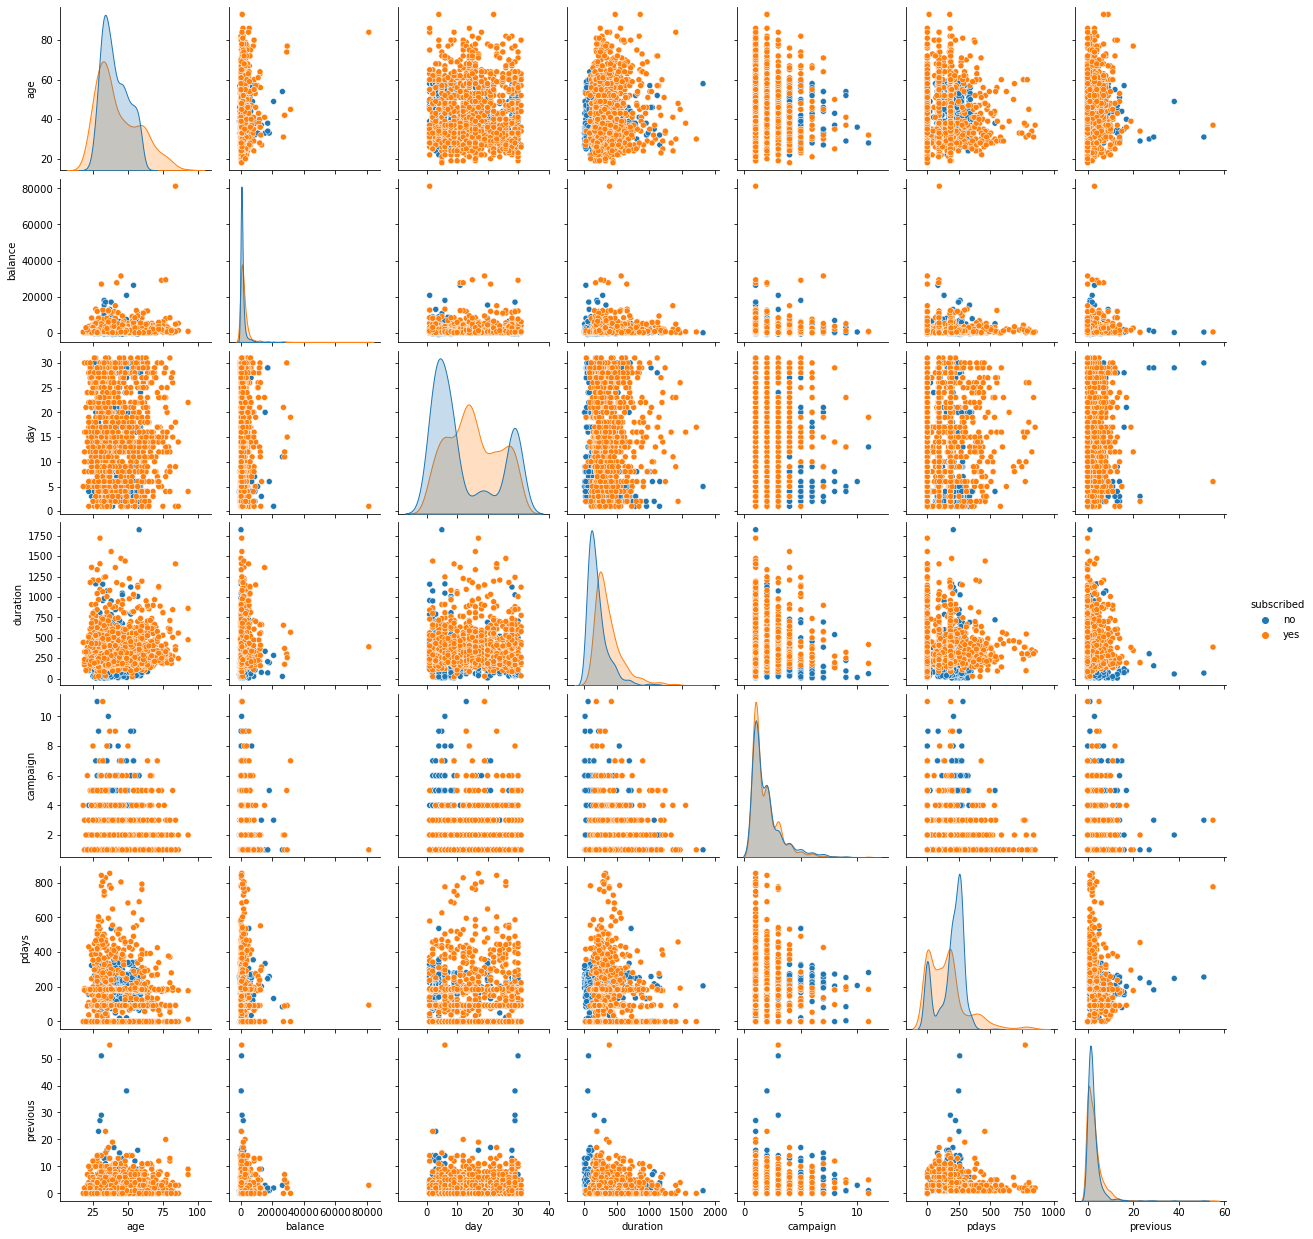

In [25]:
sns.heatmap(df.corr())

sns.pairplot(data=df, hue='subscribed')
plt.show()


✔️ Task 3 - Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).
- In this sub task, we are examining two numerical attributes using plots: Age and Balance.
- Age:
  - Majority of the customers are between 30 years old to 50 years old.
  - There are a few outliers being above 75.
- Balance:
  - Majority of the customer have balance ranges between 1000 to 2000.
  - There are quite a lot of outliers above 4000.
- Age and Balance(assuming this is outstanding balance in the balance account):
  - Under normal circumstances, we would think that as age increases, the bank balance should increase as well. However, from the below regplot, we can see that the relationship between them is very small. Balance does not change much as age changes. Few possible causes:
    - people are investing most of their income in other assets like stocks, real estates, etc
    - people are spending to improve their quality of living instead of saving their income. This may be the case as we can see that majority of the customers have personal loans.

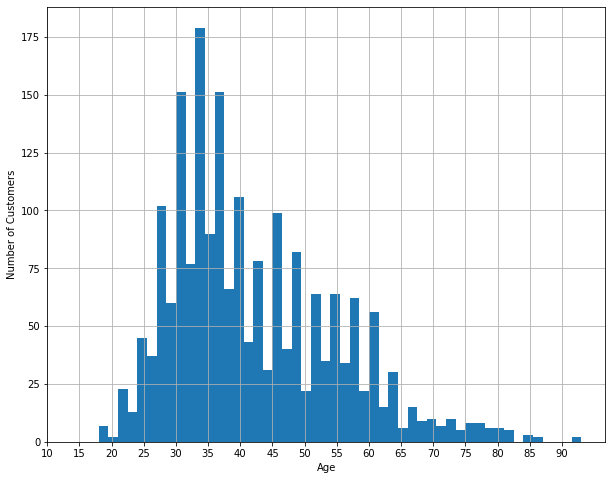

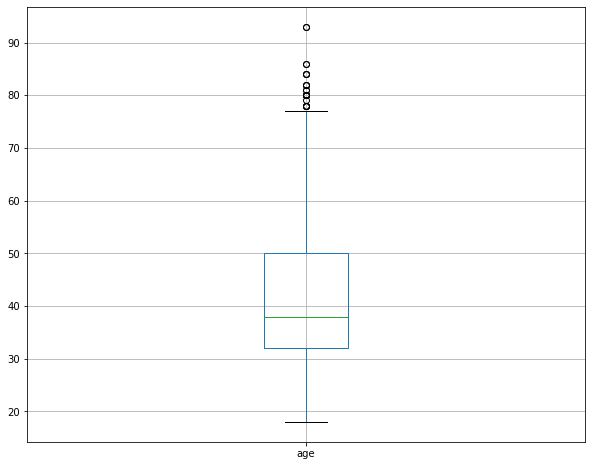

In [20]:
# age plots
plt.figure(figsize=(10, 8))
df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.xticks(np.arange(10, max(df['age']), 5))
plt.show()

plt.figure(figsize=(10, 8))
df.boxplot(column='age')
plt.show()


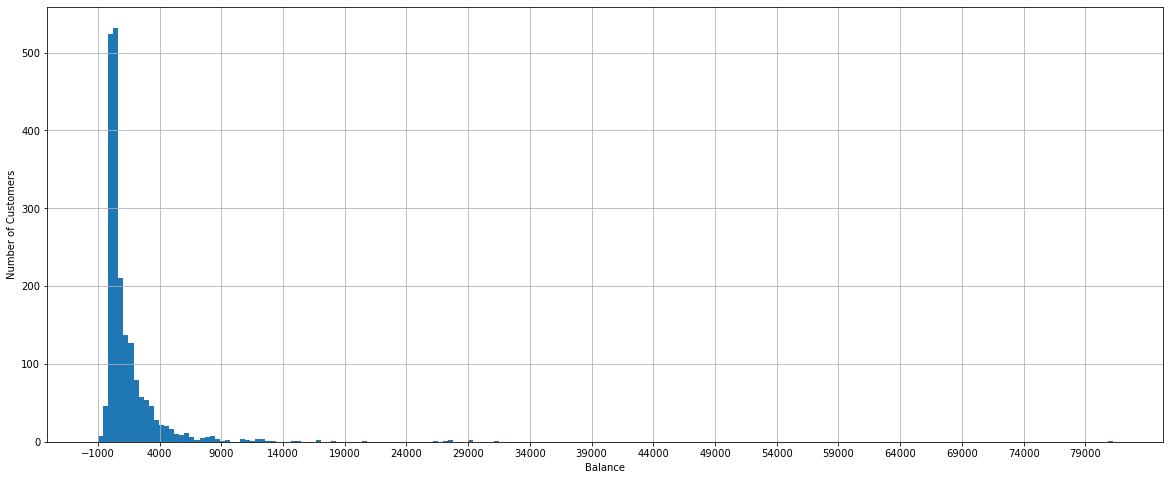

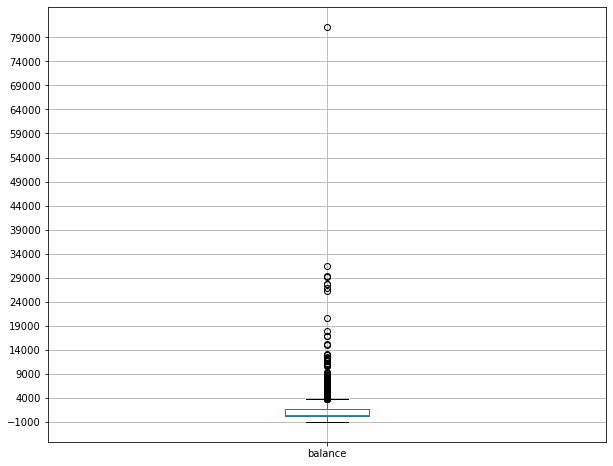

In [21]:
# balance plots
plt.figure(figsize=(20, 8))
df['balance'].hist(bins=200)
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.xticks(np.arange(round(min(df['balance']), -3), max(df['balance']), 5000))
plt.show()

plt.figure(figsize=(10, 8))
df.boxplot(column='balance')
plt.yticks(np.arange(round(min(df['balance']), -3), max(df['balance']), 5000))
plt.show()


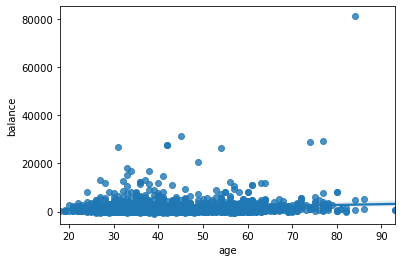

In [22]:
sns.regplot(data=df, x='age', y='balance')
plt.show()


✔️ Task 4 - Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).
- Two very simple plots are used to evaluate the effects of various features on the subscription status: violinplot for numerical columns and barplot for categorical columns.
- For the numerical columns, we can see that none of the these features have significant impact on the subscription status.
  - duration(Exception): This is not known until the subscription status is known. Therefore this should not be used for training. This is the only "feature" which affects whether customer subscribes. From the plot, we can see that customers with longer communication duration are more likely to subscribe the term deposit.
- For the categorical columns, we can see that customers without housing loan and customer who subscribed previously are more likely to subscribe again.
  - job: we can see that retired, student and unemployed are more likely to subscribe. However, they occupy a rather small percentage of the total population and this observation might not be statistically sigfinicant.
  - housing: from the plot, we see that customers without housing loan are more likely to subscribe for the term deposit. And there are roughly half of the population with housing loan.
  - poutcome: we can see that customers who subscribed previously will likely to subscribe again.

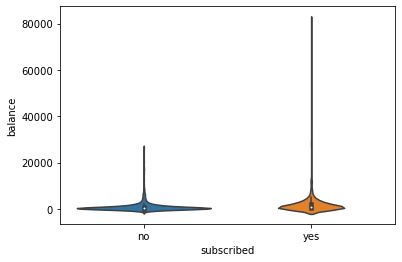

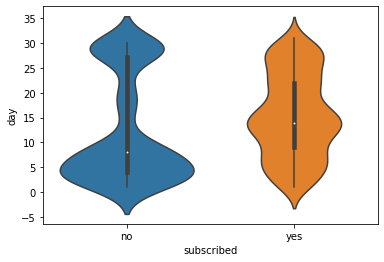

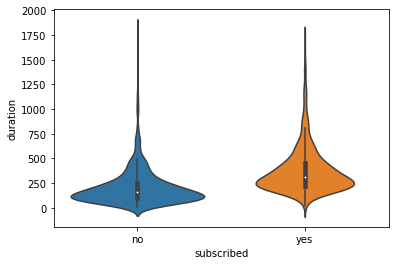

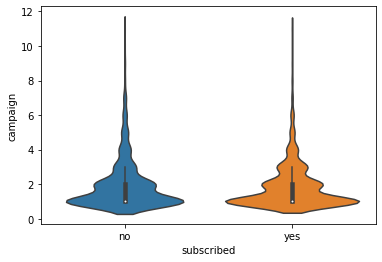

In [23]:
for col in numerical_cols:
    sns.violinplot(data=df, x='subscribed', y=col)
    plt.show()


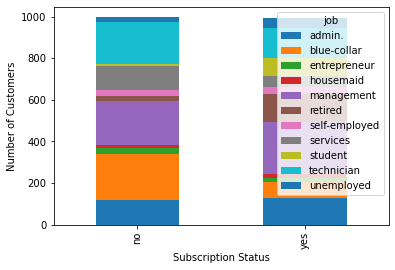

job - admin.(Weight: 12.35%) | unlikely to subscribe
job - blue-collar(Weight: 14.9%) | unlikely to subscribe
job - entrepreneur(Weight: 2.25%) | unlikely to subscribe
job - housemaid(Weight: 1.75%) | unlikely to subscribe
job - management(Weight: 23.05%) | unlikely to subscribe
job - retired(Weight: 8.1%) | likely to subscribe
job - self-employed(Weight: 3.2%) | unlikely to subscribe
job - services(Weight: 8.25%) | unlikely to subscribe
job - student(Weight: 4.8%) | likely to subscribe
job - technician(Weight: 17.4%) | unlikely to subscribe
job - unemployed(Weight: 3.45%) | likely to subscribe


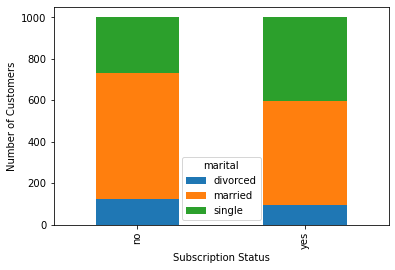

marital - divorced(Weight: 10.75%) | unlikely to subscribe
marital - married(Weight: 55.55%) | unlikely to subscribe
marital - single(Weight: 33.7%) | unlikely to subscribe


default - no(Weight: 99.25%) | unlikely to subscribe
default - yes(Weight: 0.75%) | unlikely to subscribe


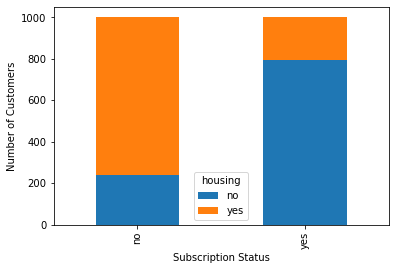

housing - no(Weight: 51.85%) | likely to subscribe
housing - yes(Weight: 48.15%) | unlikely to subscribe


loan - no(Weight: 87.5%) | unlikely to subscribe
loan - yes(Weight: 12.5%) | unlikely to subscribe


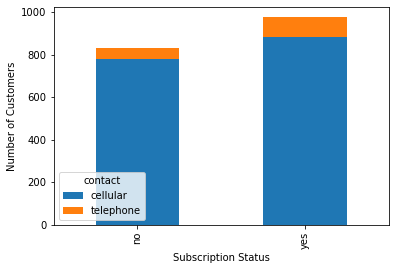

contact - cellular(Weight: 83.15%) | unlikely to subscribe
contact - telephone(Weight: 7.3%) | unlikely to subscribe


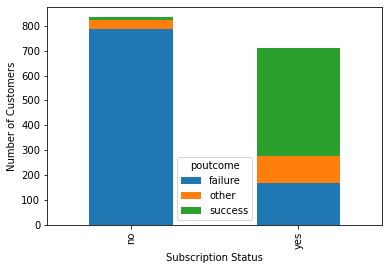

poutcome - failure(Weight: 47.75%) | unlikely to subscribe
poutcome - other(Weight: 7.35%) | likely to subscribe
poutcome - success(Weight: 22.2%) | likely to subscribe


In [26]:
for col in categorical_cols_wo_subscribed:
    crosstab_CL = pd.crosstab(df['subscribed'], df[col])
    crosstab_CL.plot(kind='bar', stacked=True)
    plt.ylabel('Number of Customers')
    plt.xlabel('Subscription Status')
    plt.show()
    for cat in crosstab_CL:
        subscribed = crosstab_CL[cat][1]
        unsubscribed = crosstab_CL[cat][0]
        sub_over_unsub = subscribed/unsubscribed
        weight = (subscribed + unsubscribed)/len(df)
        print(f'{col} - {cat}(Weight: {round(weight*100, 2)}%) | {"likely" if sub_over_unsub >= 2 else "unlikely"} to subscribe')
